## Week 2: Regression

This week, you will start learning and applying your first ML models

#### 1. Overfitting and regression in high dimension

As a first exercise, we will see that behind the name 'linear regression' is in fact hidden a lot. Consider the function


$$ f(x) = x + x^2$$


- Is the relation $t = f(x)$ linear or non linear?

- How about the relation $t = f(x, x^2)$ ?

__1.1.__To get some intuition on this, start by plotting the function $t=f(x)$ below (use linspace together with 50 points)

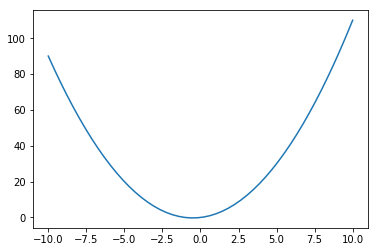

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# plot the relation $t = f(x)$

x = np.linspace(-10,10,50)

t = x + np.square(x)

plt.plot(x, t)

plt.show()

__1.2__ Then in the cell below, plot the two dimensional plane $t = f(x, x^2) = f(x,y)$ (use meshgrid together with 50x 50 points). Plot the points $(t, x, x^2)$ on top of the plane. 

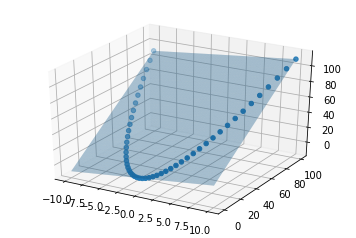

In [14]:
from mpl_toolkits.mplot3d import Axes3D


x = np.linspace(-10,10,50)
y = np.square(x)

xmesh, ymesh = np.meshgrid(x, y)

tplane  = xmesh + ymesh



fig = plt.figure()
# Add an axes
ax = fig.add_subplot(111,projection='3d')

# plot the surface
ax.plot_surface(xmesh, ymesh, tplane, alpha=0.2)

ax.scatter(x, y, x+y)


plt.show()





We have thus turned a non linear relationship between prototypes $x$ and their targets $t$, into a linear relationship encoded by the plane $t = x+y$ where $y = x^2$. In general regression will work like this. Given some pairs of prototypes and their associated targets $(t_i, x_i)$, even when the relation between the prototypes and the target is non linear in the original space, one can generate additional "features", for example, powers of monomials 'x^2', 'x^3', x^4, ... but also any non linear function of the data such as "sin(x)", "e^x", ...

and then learn a linear regression model on the newly defined feature vectors $(x, y= x^2, z= sin(x), ...)$ and the label "t". If we forget that the coordinates 


Many machine learning models, will proceed like this. They will first lift the data in some higher dimensional space where the model is learned. Then we can bring our prediction back into the original space by selecting only the first coordinate of the pair $(x,y) = (x,x^2)$

__1.3.__ The problem that often arises with this approach is that when we don't have any intuition on the relation between the prototypes $x_i$ and their targets $t_i$, we might be tempted to add many features or basis functions which then results in a too high complexity of the model and hence overfitting. To illustrate this, let us go back to the quadratic relation above.  

Go back to the pairs $x_i, t_i$ that you generated from the relation $t_i = x_i +x_i^2$ above. Now generate a subset of $20$ points and add some random Gaussian noise on the labels $t_i$, just to get 

$$t_i = x_i + x_i^2 + \varepsilon_i$$

plot the resulting points on top of the function $t = f(x)$ first and do the same with the plane.

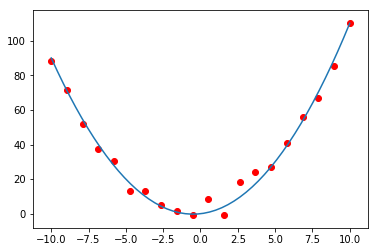

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xsample  = np.linspace(-10,10, 20)

tnoisy = xsample + np.square(xsample) + np.random.normal(0, 4, xsample.shape)


plt.plot(x,t)
plt.scatter(xsample, tnoisy, color='r')

plt.show()









__1.4__ Then generate all possible monomials of degrees less than 6 from the prototypes $x_i$ (the noisy samples). You can either do it manually or use the built in function 'PolynomialFeatures' from scikit-learn

In [22]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


__1.5__ Now use the function 'linear_regression' from scikit-learn to learn the higher dimensional regression model using the powers of $x2$ and you noisy labels $t_noisy$

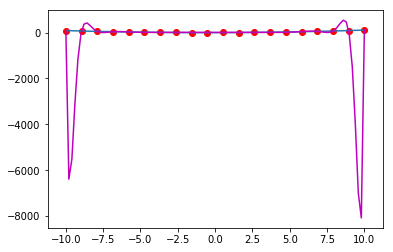

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression



# xsample are my training points/prototypes
# the two lines below generate the 12d data from the 1d prototypes
poly = PolynomialFeatures(24)
Xpolyfeature = poly.fit_transform(xsample.reshape(-1, 1))

# learn the linear regression model in the high D space
reg = LinearRegression().fit(Xpolyfeature, tnoisy)


# generate new points to study the prediction of the model
xpredict = np.linspace(-10,10, 100)

# bring those points in the high D space
poly = PolynomialFeatures(24)
XpolyfeaturePredict = poly.fit_transform(xpredict.reshape(-1, 1))

# apply the model to the new data (after brought them in the high-D space) and 
# get the predition for the 't'
tprediction = reg.predict(XpolyfeaturePredict)

# then keep only t and x for the new (prediction) points and plot
plt.plot(x,t)
plt.scatter(xsample, tnoisy, color='r')
plt.plot(xpredict, tprediction, color='m')

plt.show()








__1.6__ Once you have learned the model, we will now use it to do predictions as follows:
    
   - Start by generating points using linspace between -10 and 10 (lets say 100)
   - Raise those points to power 1 to 6 using PolynomialFeatures
   - use the function predict of your linear_regression model to get the labels
   - plot the predicted pairs (x, t)

In [ ]:
# put the code here



__1.7__ Repeat the experiments above for 12 and then 24 features. What do you notice?

### 2. Regularization 

We have seen that a high complexity is not always a good idea. In particular, if the model can be expressed by fewer parameters we should always aim at selecting the greater simplicity. However this simplicity is often hidden in the data and is therefore not blatant to the naked eye. For this reason, having a general procedure that one can apply to the data and whose complexity could be easilty adapter to this data, would be much appreciated. This idea of adapting model complexity to the data is precisely the objective of regularization.

__2.1__ Regularization comes in many different flavors. But the most common models are based on putting some constraints on the number of parameters of the model, or, on the magnitude of those parameters in order to avoid the large variation that we observed when considering the model with the $24$ polynomial features. 

The three most common regularization approaches are the $\ell_2$, $\ell_1$ and Best subset selection approaches. In each of these approaches, instead of solving the original regression problem

\begin{align}
\min_{\beta_1,\beta_2, \ldots, \beta_D} \sum_{i=1}^N |t_i - \sum_{\ell=1}^D \beta_\ell x_{\ell,i}|^2 
\end{align}

we will augment our loss with a penalty.


- In Ridge Regression, the penalty is the $2$ norm 
$$\|\beta\|_2 = \sqrt{\sum_{i=1}^N \beta_i^2}$$
- In Lasso, the penalty is the $1$ norm (sum of the absolute values)
$$\|\beta\|_1 = \sum_{i=1}^N |\beta_i^2|$$

- In Best subset selection, we compute, for every every possible subset of coefficients $(\beta_0, \beta_1, \ldots, \beta_D)$, the value of the loss on the prediction data and we select the subset (of each chosen size) that minimizes the value of the loss. From this, we thus have a sequence of best subsets of coefficients for each size parameter $K$. 




- The last approach is computationally expensive because of the ${N\choose k}$ that appears in the number of subsets. For this reason we won't apply it on the 6 feature. However you can implement it for 3 features. 

- Ridge regression and Lasso are very popular and are preimplented in scikit-learn. Try rach approach for different values of lambda on the 6 feature dataset above (don't forget the noise). Then try those approach with 12 and 24 features and plot the resulting model as we did in the case of a simple regression formulation. How do the models compare to each other?



__2.2. Cross validation on $\lambda$ and $K$.__ 

Be it for the best subset selection approach, or for the ridge and lasso models, one question remain: How does one choose the last parameters $K$ and $lambda$. 

This last step is carried out through some validation or cross validation step.

The simplest possible approach could be to split the original dataset between a training and a test part. Another approach is to split the data into $k$ bins. For each bin, the model is trained using the datapoints in $\mathcal{D}\setminus B_k$, that is all the prorotypes that are not in $B_k$ and the prediction error for a given subset size or for a value of $\lambda$. The total error is then computed as the average 

\begin{align}
CV(\lambda) = \frac{1}{N}\sum_{i=1}^N \ell(t_i, f^{k(i)}(x_i))
\end{align}
where $f^k$ denotes the model learned with the points the bin $k(i)$. The procedure is then repeated for the various values of $\lambda$ the (hyper)-parameter that minimizes the prediction error is then selected. 

- For various value of $\lambda$, using either of leave one out, K-fold or simply any training/test splitting of the dataset, plot the evolution of the training and test error

In [ ]:
# put your code here




### 3. Real data

Now that you are familiar with regression, we will apply it to some real data. Use the line below to load the Google stock value between 2017-01-01 and 2017-04-30. Then using the train/test decomposition given below. Learn a good 'time vs stock value' regression model and apply it on the test data to see how well it an predict future values. 

In [36]:
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr

import matplotlib.pyplot as plt

import yfinance as yf

#fix_yahoo_finance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data1 = pdr.get_data_yahoo("GOOGL", start="2017-01-01", end="2017-04-30")



close = data1['Close']

all_weekdays = pd.date_range(start="2017-01-01", end="2017-04-30", freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')


msft = close#.loc['SPY']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

msft = msft.dropna()
#msft_norm = (msft - msft.mean()) / (msft.max() - msft.min())


tmp = msft.index
numDays = tmp.shape[0]

days = np.arange(1,numDays+1)

# normalized prices
print(msft.index)


tmp1 = 60

X_train = days[0:tmp1]
X_test = days[tmp1:]

y_train = msft[0:tmp1]
y_test = msft[tmp1:]

print(y_train[0])

tmp = y_train.values





[*********************100%***********************]  1 of 1 downloaded
DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02', '2017-03-03',
               '2017-03-06', '2017-03-07', '2017-03-08', '2017-03-09',
               '2017-03-10', '2017-03-13', '2017-03-14', '2017-03-15',
       